# Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Dataset Description

In [2]:
df = pd.read_csv('/kaggle/input/sales-analysis-dataset/AusApparalSales4thQrt2020.csv')

In [3]:
df.shape

(7560, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [5]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Data Wrangling

### Checking for missing values

In [6]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

### Manually checking for incorrect entries

In [7]:
df['Time'].value_counts()

Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64

In [8]:
df['State'].value_counts()

State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64

In [9]:
df['Group'].value_counts()

Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64

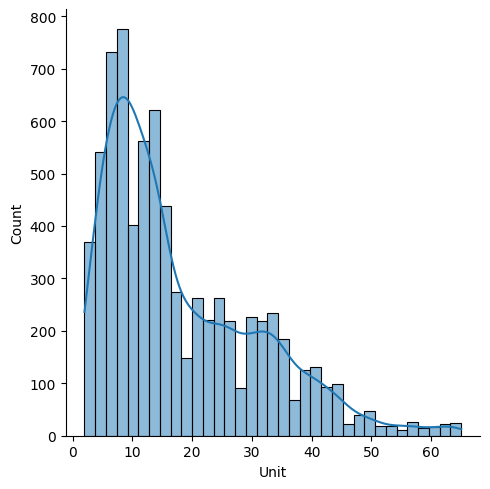

In [10]:
sns.displot(data = df, x = 'Unit', kde = True)

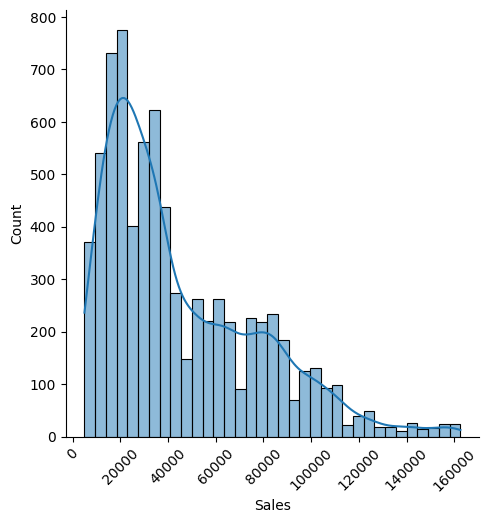

In [11]:
sns.displot(data = df, x = 'Sales', kde = True)
plt.xticks(rotation = 45)
plt.show()

1. No null values.
2. No incorrect entries.

# Data Analysis

### Descriptive Statistical Analysis

In [12]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


<Axes: ylabel='Sales'>

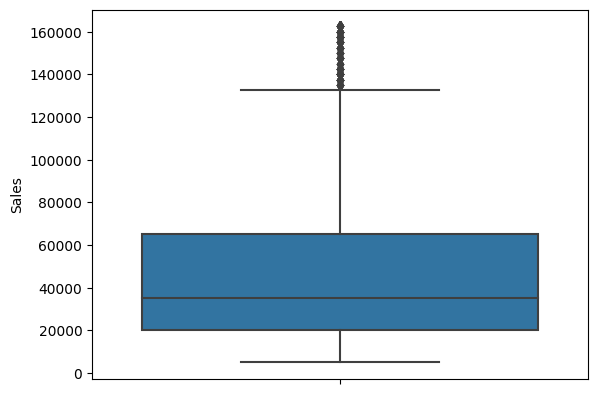

In [13]:
sns.boxplot(y = 'Sales', data = df)

<Axes: ylabel='Unit'>

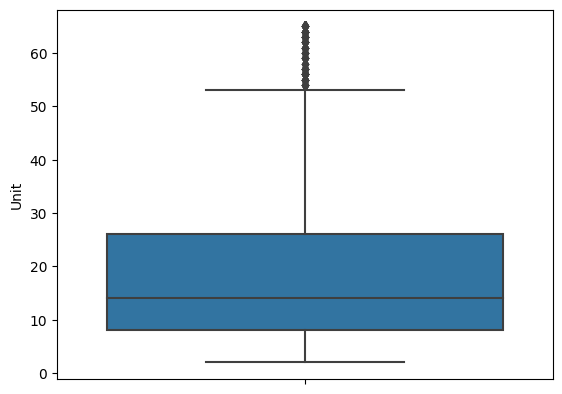

In [14]:
sns.boxplot(y = 'Unit', data = df)

In [15]:
q1 = np.percentile(df['Sales'], 25)
q3 = np.percentile(df['Sales'], 75)
iqr = q3 - q1

In [16]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [17]:
df[(df['Sales'] > upper_limit)]

,Date,Time,State,Group,Unit,Sales
5082,1-Dec-2020,Afternoon,VIC,Women,63,157500
5083,1-Dec-2020,Afternoon,VIC,Seniors,62,155000
5161,2-Dec-2020,Morning,VIC,Men,56,140000
5162,2-Dec-2020,Morning,VIC,Women,59,147500
5169,2-Dec-2020,Evening,VIC,Men,64,160000
...,...,...,...,...,...,...
7432,29-Dec-2020,Afternoon,VIC,Kids,65,162500
7433,29-Dec-2020,Afternoon,VIC,Men,54,135000
7437,29-Dec-2020,Evening,VIC,Men,54,135000
7515,30-Dec-2020,Morning,VIC,Seniors,65,162500


In [18]:
df[(df['Sales'] < lower_limit)]

,Date,Time,State,Group,Unit,Sales


### Groups with highest and lowest sales

In [19]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [20]:
df.groupby('Time')['Sales'].sum().sort_values(ascending = False)

Time
Morning      114207500
Afternoon    114007500
Evening      112087500
Name: Sales, dtype: int64

In [21]:
df.groupby('State')['Sales'].sum().sort_values(ascending = False)

State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

In [22]:
df.groupby('Group')['Sales'].sum().sort_values(ascending = False)

Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

In [23]:
df.groupby(['State', 'Time'])['Sales'].sum().sort_values(ascending = False)

State  Time     
VIC    Morning      35622500
       Afternoon    35062500
       Evening      34880000
NSW    Morning      25147500
       Afternoon    25110000
       Evening      24712500
SA     Afternoon    20025000
       Morning      19465000
       Evening      19367500
QLD    Morning      11437500
       Afternoon    11347500
       Evening      10632500
TAS    Afternoon     7670000
NT     Evening       7627500
WA     Morning       7567500
TAS    Evening       7565000
       Morning       7525000
NT     Afternoon     7510000
       Morning       7442500
WA     Evening       7302500
       Afternoon     7282500
Name: Sales, dtype: int64

In [24]:
df.groupby(['State', 'Group'])['Sales'].sum().sort_values(ascending = False)

State  Group  
VIC    Women      26482500
       Men        26407500
       Kids       26360000
       Seniors    26315000
NSW    Women      19172500
       Men        19022500
       Kids       18587500
       Seniors    18187500
SA     Women      14970000
       Seniors    14717500
       Men        14655000
       Kids       14515000
QLD    Kids        8510000
       Men         8392500
       Women       8325000
       Seniors     8190000
TAS    Kids        5775000
NT     Men         5762500
TAS    Men         5757500
WA     Men         5752500
NT     Kids        5700000
       Women       5652500
TAS    Seniors     5650000
WA     Kids        5625000
TAS    Women       5577500
WA     Seniors     5512500
NT     Seniors     5465000
WA     Women       5262500
Name: Sales, dtype: int64

In [25]:
df.groupby(['State', 'Time', 'Group'])['Sales'].sum().sort_values(ascending = False)

State  Time       Group  
VIC    Morning    Seniors    9057500
                  Kids       8950000
       Evening    Women      8930000
                  Men        8900000
       Afternoon  Seniors    8830000
                              ...   
WA     Evening    Seniors    1792500
       Afternoon  Seniors    1770000
       Morning    Women      1767500
NT     Morning    Seniors    1760000
WA     Afternoon  Women      1685000
Name: Sales, Length: 84, dtype: int64

### Weekly, Monthly & Quarterly Reports 

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [28]:
weekly_data = df.resample('W', on='Date').sum().reset_index()

In [29]:
weekly_data[['Date', 'Sales']]

,Date,Sales
0,2020-10-04,15045000
1,2020-10-11,27002500
2,2020-10-18,26640000
3,2020-10-25,26815000
4,2020-11-01,21807500
5,2020-11-08,20865000
6,2020-11-15,21172500
7,2020-11-22,21112500
8,2020-11-29,21477500
9,2020-12-06,29622500


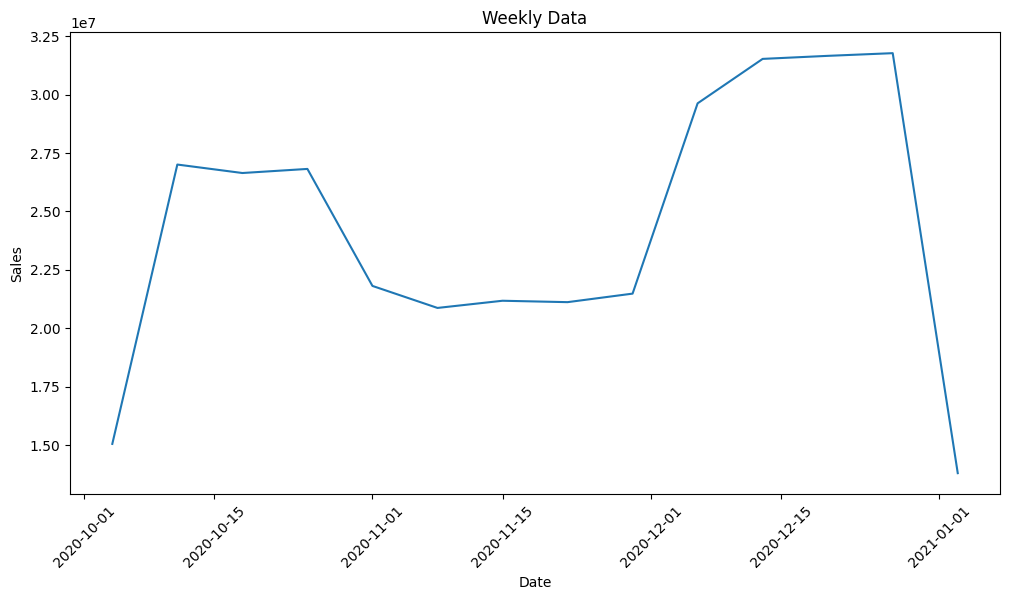

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=weekly_data)
plt.title('Weekly Data')
plt.xticks(rotation=45)
plt.show()

In [31]:
monthly_data = df.resample('M', on='Date').sum().reset_index()

In [32]:
monthly_data

,Date,Time,State,Group,Unit,Sales
0,2020-10-31,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,45716,114290000
1,2020-11-30,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,36273,90682500
2,2020-12-31,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,54132,135330000


In [33]:
monthly_data[['Date', 'Sales']]

,Date,Sales
0,2020-10-31,114290000
1,2020-11-30,90682500
2,2020-12-31,135330000


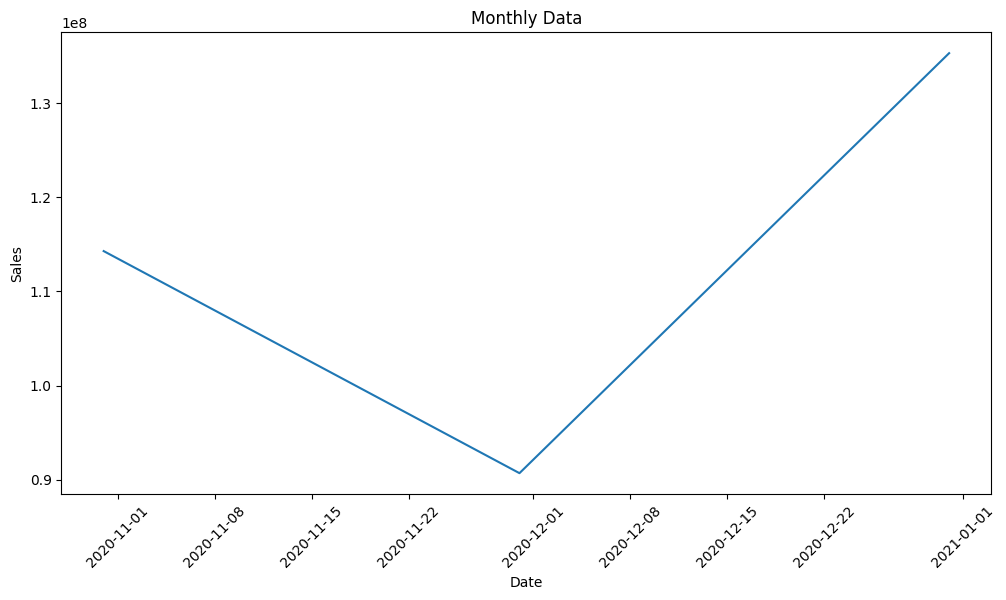

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=monthly_data)
plt.title('Monthly Data')
plt.xticks(rotation=45)
plt.show()

In [35]:
quarterly_data = df.resample('QE', on='Date').sum().reset_index()
quarterly_data['Sales']

0    340302500
Name: Sales, dtype: int64

1. We have outliers in Sales and Unit columns.
2. Most of the sales are seen in Morning time of the day.
3. VIC state has the highest sales.
4. Men group has the highest sales.

# Data Visualization

### State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).

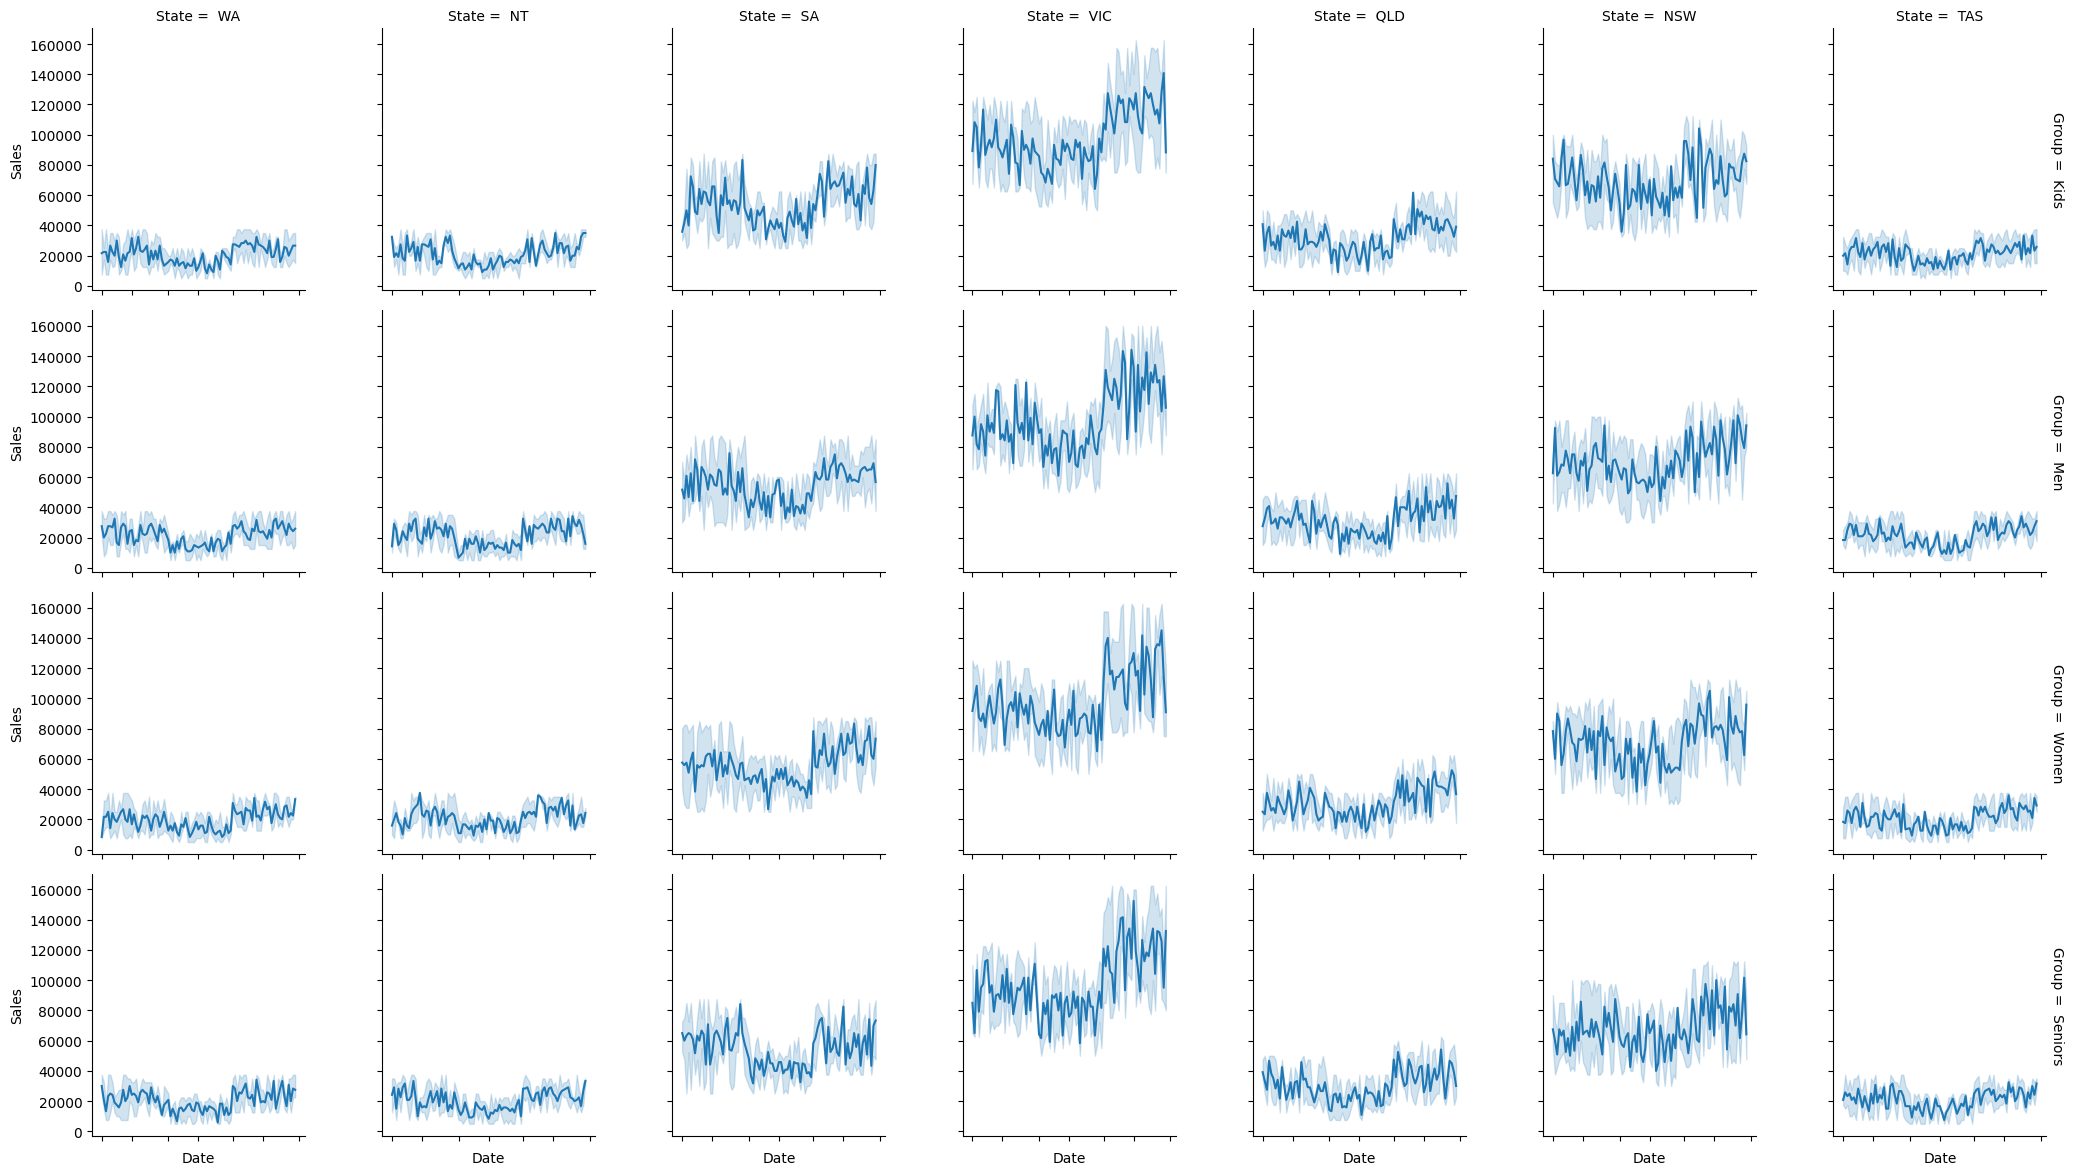

In [36]:
g = sns.FacetGrid(df, col='State', row='Group', margin_titles=True)
g.map(sns.lineplot, 'Date', 'Sales')
g.set_xticklabels(rotation=45)
plt.show()

### Time-of-the-Day Analysis

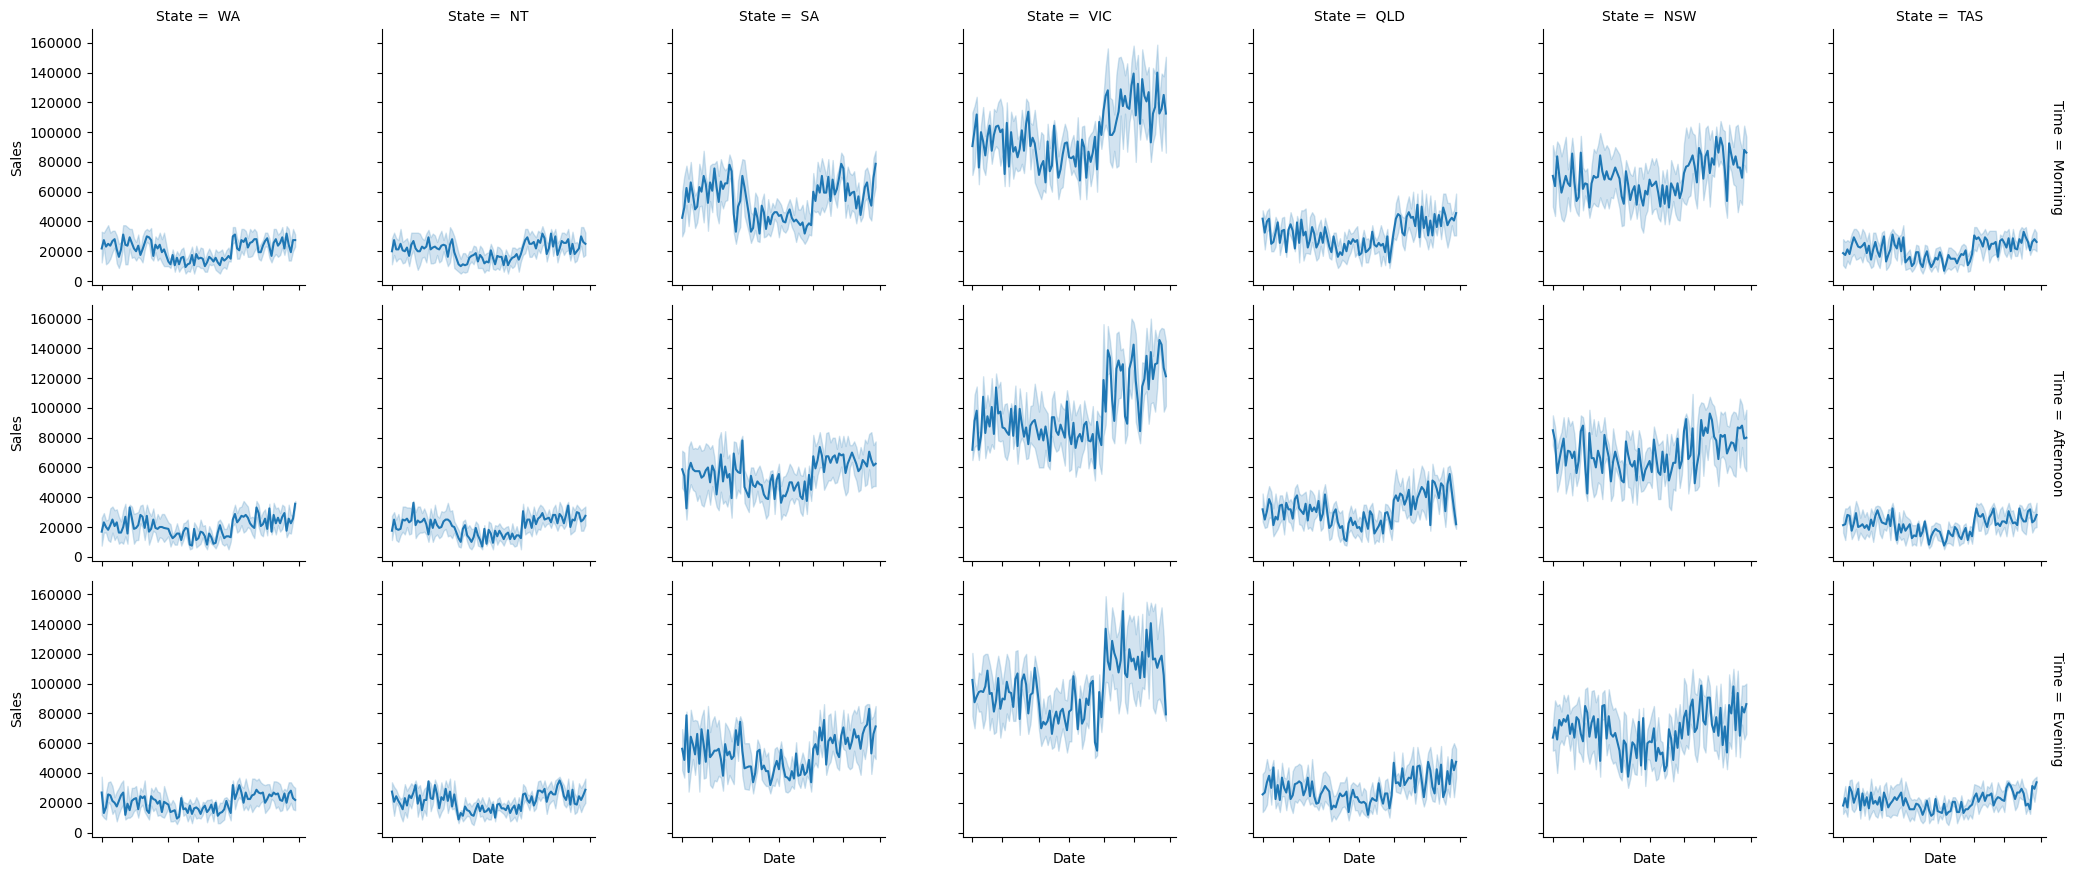

In [37]:
g = sns.FacetGrid(df, col='State', row='Time', margin_titles=True)
g.map(sns.lineplot, 'Date', 'Sales')
g.set_xticklabels(rotation=45)
plt.show()